### This notebook is where I'll be modelling the stream particles of Boo3, to compare with Kevin's data (plotted in V_r vs. RA, and proper motions).

In [2]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [2]:
from matplotlib.patches import Rectangle

In [4]:
pot = MWPotential2014
tdisrupt=5
mass = 1e7

ro = 8.
vo = 220.
to = conversion.time_in_Gyr(ro=ro, vo=vo)
mo = conversion.mass_in_msol(ro=ro, vo=vo)

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
o.turn_physical_off()

In [4]:
print("My mass is:", mass, "Solar masses")

My mass is: 10000000.0 Solar masses


In [5]:
#o_lmc6, oall_lmc6, dtall_lmc6 = graphics.streamorbitslmc_acc(mass/10, o, tdisrupt, pot=pot, nstar=500)

In [6]:
#o_lmc7, oall_lmc7, dtall_lmc7 = graphics.streamorbitslmc_acc(mass, o, tdisrupt, pot=pot, nstar=500)

In [7]:
#o_lmc65, oall_lmc65, dtall_lmc65 = graphics.streamorbitslmc_acc(mass*0.5, o, tdisrupt, pot=pot, nstar=500)

In [8]:
#o_lmc75, oall_lmc75, dtall_lmc75 = graphics.streamorbitslmc_acc(mass*5, o, tdisrupt, pot=pot, nstar=500)

### Saving the data

In [9]:
#import pickle
#file_streams = open('lmc_stream_models_N500.obj', 'wb')

streams_dict = {
    "MW14 1E6" : oall_lmc6,
    "MW14 5E6" : oall_lmc65,
    "MW14 1E7" : oall_lmc7,
    "MW14 5E7" : oall_lmc75,
#    "MCM17 1E7" : oall_lmc17,
#    "MCM17 5*1E7" : oall_lmc172,
#    "MCM17 2.5*1E6" : oall_lmc173
}

#pickle.dump(streams_dict, file_streams)
#file_streams.close()

NameError: name 'oall_lmc6' is not defined

In [10]:
import pickle
filehandler = open('lmc_stream_models_N500.obj', 'rb') 
obj = pickle.load(filehandler)

oall_lmc6 = obj.get("MW14 1E6")
oall_lmc65 = obj.get("MW14 5E7")
oall_lmc7 = obj.get("MW14 1E7")
oall_lmc75 = obj.get("MW14 5E7")

### Plot generation

In [11]:
sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]

MWpotLMC = graphics.lmc_potential_wacc(tdisrupt, pot=MWPotential2014)

o_intb = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
tsb = np.linspace(0, -1/to, 201)
o_intb.integrate(tsb, pot=MWpotLMC)
o_intf = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
tsf = np.linspace(0, 1/to, 201)
o_intf.integrate(tsf, pot=MWpotLMC)

# McpotLMC = graphics.lmc_potential_wacc(tdisrupt, pot=McMillan17)

# o_intmcb = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
# o_intmcb.turn_physical_off()
# o_intmcb.integrate(tsb, pot=McpotLMC)

# o_intmcf = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
# o_intmcf.turn_physical_off()
# o_intmcf.integrate(tsf, pot=McpotLMC)

In [12]:
def gen_plot(ointb, ointf, oall, o):
    fig = plt.figure(figsize=(12,15))
    ax1 = fig.add_subplot(321)
    ax2 = fig.add_subplot(322)
    ax3 = fig.add_subplot(323)
    ax4 = fig.add_subplot(324)
    
    ax1.scatter(oall.ra(), oall.dec());
    ax1.plot(o.ra(), o.dec(), "ro", label='Boo3');
    ax1.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-');
    ax1.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
    ax1.set_xlim(213, 206)
    ax1.set_ylim(24.5, 29)
    ax1.set_title('Ra vs. Dec')
    ax1.set_xlabel('RA (deg)')
    ax1.set_ylabel('DEC (deg)')
    ax1.legend()
    ax1.minorticks_on()
    
    ax2.scatter(oall.ra(), oall.vlos());
    ax2.plot(o.ra(), o.vlos(), "ro", label='Boo3');
    ax2.plot(ointb.ra(tsb), ointb.vlos(tsb), 'k-');
    ax2.plot(ointf.ra(tsf), ointf.vlos(tsf), 'k--');
    ax2.set_xlim(213, 206)
    ax2.set_ylim(165, 230)
    ax2.set_title('Radial Velocity')
    ax2.set_xlabel('RA (deg)')
    ax2.set_ylabel('Radial Velocity (km/s)')
    ax2.legend()
    ax2.minorticks_on()
    
    ax3.scatter(oall.ra(), oall.pmra());
    ax3.plot(o.ra(), o.pmra(), "ro", label='Boo3');
    ax3.plot(ointb.ra(tsb)[:10], ointb.pmra(tsb)[:10], 'k-');
    ax3.plot(ointf.ra(tsf)[:100], ointf.pmra(tsf)[:100], 'k--');
    ax3.set_xlim(213, 206)
    ax3.set_ylim(-2, 0)
    ax3.set_title('Proper Motion (Ra)')
    ax3.set_xlabel('RA (deg)')
    ax3.set_ylabel('PMRA (mas/yr)')
    ax3.legend()
    ax3.minorticks_on()
    
    ax4.scatter(oall.ra(), oall.pmdec());
    ax4.plot(o.ra(), o.pmdec(), "ro", label='Boo3');
    ax4.plot(ointb.ra(tsb)[:10], ointb.pmdec(tsb)[:10], 'k-');
    ax4.plot(ointf.ra(tsf)[:100], ointf.pmdec(tsf)[:100], 'k--');
    ax4.set_xlim(213, 206)
    ax4.set_ylim(-2, 0)
    ax4.set_title('Proper Motion (Dec)')
    ax4.set_xlabel('RA (deg)')
    ax4.set_ylabel('PMDEC (mas/yr)')
    ax4.legend()
    ax4.minorticks_on()
    
    plt.tight_layout()
    #plt.show();

    
    
    #fig2 = plt.figure(figsize=(5,10))
    ax5 = fig.add_subplot(325)
    ax6 = fig.add_subplot(326)
    
    ax5.scatter(oall.pmra(), oall.pmdec())
    ax5.scatter(o.pmra(), o.pmdec(), c='red', label='Boo3')
    ax5.plot(ointb.pmra(tsb)[:20], ointb.pmdec(tsb)[:20], 'k-');
    ax5.plot(ointf.pmra(tsf)[:150], ointf.pmdec(tsf)[:150], 'k--');
    ax5.legend()
    ax5.set_xlim(-2,0)
    ax5.set_ylim(-2,0)
    ax5.set_title('Proper Motions')
    ax5.set_xlabel('PMRA (mas/yr)')
    ax5.set_ylabel('PMDEC (mas/yr)')
    
    ax6.scatter(oall.ra(), oall.dist());
    ax6.scatter(o.ra(), o.dist(), c='red', label='Boo3');
    ax6.plot(ointb.ra(tsb), ointb.dist(tsb), 'k-');
    ax6.plot(ointf.ra(tsf), ointf.dist(tsf), 'k--');
    ax6.set_xlim(213, 206)
    ax6.set_ylim(30,60)
    ax6.legend()
    ax6.set_title('Distance')
    ax6.set_xlabel('RA (deg)')
    ax6.set_ylabel('Distance (kpc)')
    
    ax5.minorticks_on()
    ax6.minorticks_on()
    plt.show();
    return None

In [13]:
for key, value in streams_dict.items():
    print(key)
    gen_plot(o_intb, o_intf, value, o)

NameError: name 'streams_dict' is not defined

## Running simulation with Kevin's data:

In [5]:
sixD_kevin_means = [209.3, 26.8, 46.5, -1.16, -0.88, 189.8]
o_k = Orbit(vxvv = sixD_kevin_means, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
o_k.turn_physical_off()

pot = MWPotential2014
tdisrupt = 5
mass = 1e7

In [6]:
#ok_lmc7, oallk_lmc7, dtallk_lmc7 = graphics.streamorbitslmc_acc(mass, o_k, tdisrupt, pot=pot, nstar=500)

In [7]:
#ok_lmc75, oallk_lmc75, dtallk_lmc75 = graphics.streamorbitslmc_acc(mass*5, o_k, tdisrupt, pot=pot, nstar=500)

In [8]:
#ok_lmc6, oallk_lmc6, dtallk_lmc6 = graphics.streamorbitslmc_acc(mass*0.1, o_k, tdisrupt, pot=pot, nstar=500)

In [9]:
#ok_lmc65, oallk_lmc65, dtallk_lmc65 = graphics.streamorbitslmc_acc(mass*0.5, o_k, tdisrupt, pot=pot, nstar=500)

In [10]:
MWpotLMC = graphics.lmc_potential_wacc(tdisrupt, pot=MWPotential2014)

ok_intb = Orbit(vxvv = sixD_kevin_means, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
tsb = np.linspace(0, -1/to, 201)
ok_intb.integrate(tsb, pot=MWpotLMC)
ok_intf = Orbit(vxvv = sixD_kevin_means, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
tsf = np.linspace(0, 1/to, 201)
ok_intf.integrate(tsf, pot=MWpotLMC)

In [11]:
for key, value in streams_dict_k.items():
    print(key)
    gen_plot(ok_intb, ok_intf, value, o_k)

NameError: name 'streams_dict_k' is not defined

In [ ]:
#import pickle
#file_streams = open('lmc_stream_models_k_N500.obj', 'wb')

"""
streams_dict_k = {
    "K: MW14 1E6" : oallk_lmc6,
    "K: MW14 5E6" : oallk_lmc65,
    "K: MW14 1E7" : oallk_lmc7,
    "K: MW14 5E7" : oallk_lmc75
#    "MCM17 1E7" : oall_lmc17,
#    "MCM17 5*1E7" : oall_lmc172,
#    "MCM17 2.5*1E6" : oall_lmc173
}
"""

#pickle.dump(streams_dict_k, file_streams)
#file_streams.close()

In [12]:
import pickle
filehandler = open('lmc_stream_models_k_N500.obj', 'rb') 
obj = pickle.load(filehandler)

oallk_lmc6 = obj.get("K: MW14 1E6")
oallk_lmc65 = obj.get("K: MW14 5E6")
oallk_lmc7 = obj.get("K: MW14 1E7")
oallk_lmc75 = obj.get("K: MW14 5E7")

## Including Kevin's star sample:

In [13]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"boo3_sample_S5.csv",sep='\s+')

In [14]:
data

,absdev_1700d_0,absdev_1700d_0.mask,absdev_580v_0,absdev_580v_0.mask,alpha1,alpha16,alpha50,alpha84,alpha99,alpha_kurt,...,ew1,ew1err,ew2,ew2err,ew3,ew3err,ew,ew_err,feh_cat,feh_cat_err
0,0.371702,False,0.107991,False,-0.033435,0.544255,0.891108,1.113227,1.194176,0.858827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.047487,False,0.147358,False,0.944136,0.982067,1.001709,1.022237,1.070928,1.377276,...,-1.66,0.75,-1.62,0.82,-2.25,0.79,-5.53,1.363452,-1.737335,0.532358
2,0.153102,False,0.121326,False,0.537478,0.739210,0.905017,1.056278,1.187325,-0.362106,...,-0.33,0.14,-1.22,0.22,-1.91,0.73,-3.46,0.775177,-2.085043,0.361710
3,0.261796,False,0.203424,False,0.423396,0.775465,0.999499,1.146095,1.196489,0.563905,...,-0.68,1.00,-1.15,1.22,-0.87,1.17,-2.70,1.964001,-2.406108,0.951683
4,0.498957,False,0.234050,False,0.131494,0.358996,0.538244,0.744319,1.037159,-0.039246,...,-0.40,0.62,-1.08,0.96,-0.70,0.15,-2.18,1.152606,-2.539220,0.634567
5,0.135704,False,0.150080,False,0.614855,0.832007,1.017545,1.152678,1.196833,-0.075130,...,-0.90,0.22,-2.60,0.61,-4.42,0.30,-7.92,0.714493,-0.675752,0.293106
6,0.465507,False,0.182760,False,0.427036,0.817771,1.028032,1.146906,1.196258,1.636585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.312284,False,0.306515,False,0.021760,0.491336,0.796845,1.066131,1.192841,0.085566,...,-0.26,0.39,-1.84,1.56,-0.69,1.42,-2.79,2.145251,-2.194482,1.059581
8,0.111427,False,0.161611,False,0.197638,0.421531,0.601518,0.782383,1.071480,0.114357,...,-0.80,1.10,-1.42,1.50,-1.20,1.38,-3.42,2.316117,-2.193917,1.027397
9,0.250686,False,0.213907,False,0.173391,0.504818,0.748476,0.999926,1.181139,-0.396628,...,-1.29,0.72,-2.43,1.17,0.00,0.00,-3.72,1.373790,-1.835977,0.630880


In [15]:
ra = data.ra.to_list()
dec = data.dec.to_list()
vel = data.vel_calib.to_list()
vel_err = data.vel_calib_std.to_list()
pmra = data.pmra.to_list()
pmra_err = data.pmra_error.to_list()
pmdec = data.pmdec.to_list()
pmdec_err = data.pmdec_error.to_list()

In [16]:
styx_radec = pd.read_csv(r"styx_radec.csv")
styx_trace = pd.read_csv(r"styx_trace.csv")

styx_ra = styx_radec.ra.to_list()
styx_dec = styx_radec.dec.to_list()

styx_tra = styx_trace.ra.to_list()
styx_tdec = styx_trace.dec.to_list()

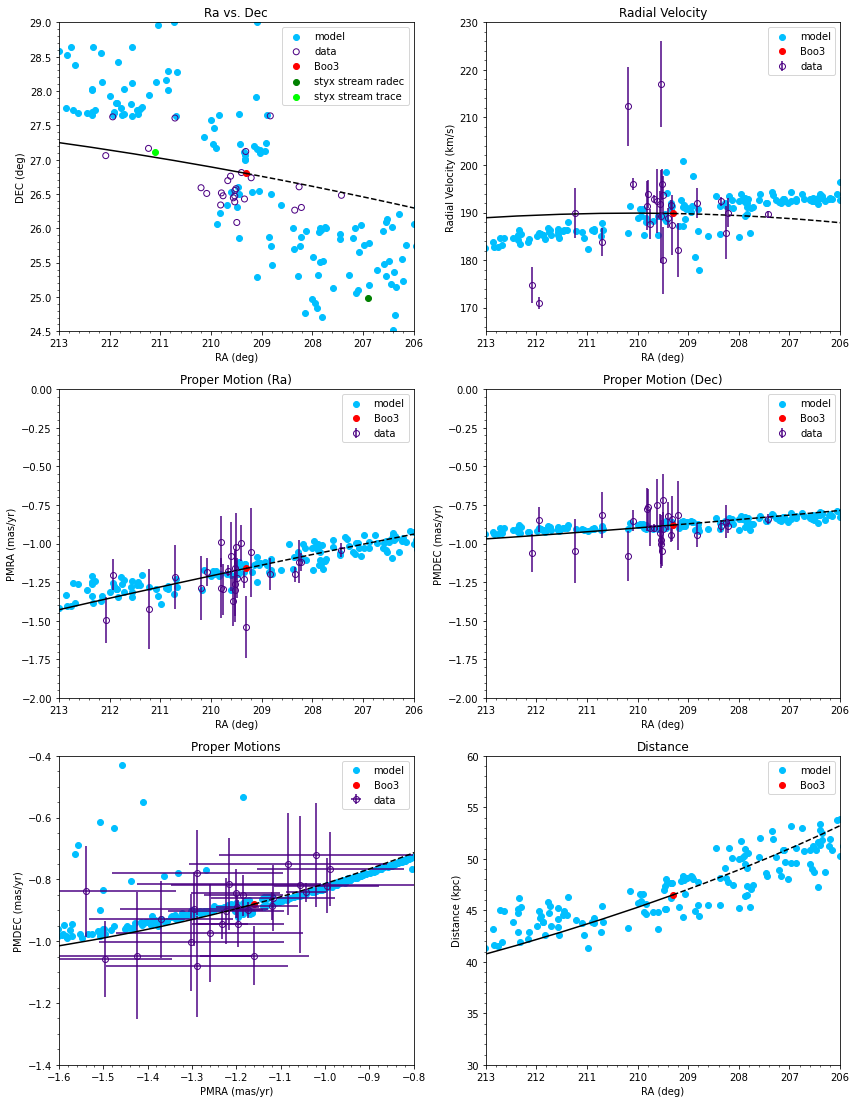

In [17]:
oall = oallk_lmc65
o = o_k
ointb = ok_intb
ointf = ok_intf



fig = plt.figure(figsize=(12,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)

ax1.scatter(oall.ra(), oall.dec(), c='deepskyblue', label='model');
ax1.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax1.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax1.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-');
ax1.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
ax1.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax1.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
ax1.set_xlim(213, 206)
ax1.set_ylim(24.5, 29)
ax1.set_title('Ra vs. Dec')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('DEC (deg)')
ax1.legend()
ax1.minorticks_on()

ax2.scatter(oall.ra(), oall.vlos(), c='deepskyblue', label='model');
ax2.errorbar(ra, vel, yerr=vel_err, markerfacecolor='none', markeredgecolor='indigo', fmt='o', ecolor='indigo', label='data')
ax2.plot(o.ra(), o.vlos(), "ro", label='Boo3');
ax2.plot(ointb.ra(tsb), ointb.vlos(tsb), 'k-');
ax2.plot(ointf.ra(tsf), ointf.vlos(tsf), 'k--');
ax2.set_xlim(213, 206)
ax2.set_ylim(165, 230)
ax2.set_title('Radial Velocity')
ax2.set_xlabel('RA (deg)')
ax2.set_ylabel('Radial Velocity (km/s)')
ax2.legend()
ax2.minorticks_on()

ax3.scatter(oall.ra(), oall.pmra(), c='deepskyblue', label='model');
ax3.errorbar(ra, pmra, yerr=pmra_err, markerfacecolor='none', markeredgecolor='indigo', fmt='o', ecolor='indigo', label='data')
ax3.plot(o.ra(), o.pmra(), "ro", label='Boo3');
ax3.plot(ointb.ra(tsb)[:10], ointb.pmra(tsb)[:10], 'k-');
ax3.plot(ointf.ra(tsf)[:100], ointf.pmra(tsf)[:100], 'k--');
ax3.set_xlim(213, 206)
ax3.set_ylim(-2, 0)
ax3.set_title('Proper Motion (Ra)')
ax3.set_xlabel('RA (deg)')
ax3.set_ylabel('PMRA (mas/yr)')
ax3.legend()
ax3.minorticks_on()

ax4.scatter(oall.ra(), oall.pmdec(), c='deepskyblue', label='model');
ax4.errorbar(ra, pmdec, yerr=pmdec_err, markerfacecolor='none', markeredgecolor='indigo', fmt='o', ecolor='indigo', label='data')
ax4.plot(o.ra(), o.pmdec(), "ro", label='Boo3');
ax4.plot(ointb.ra(tsb)[:10], ointb.pmdec(tsb)[:10], 'k-');
ax4.plot(ointf.ra(tsf)[:100], ointf.pmdec(tsf)[:100], 'k--');
ax4.set_xlim(213, 206)
ax4.set_ylim(-2, 0)
ax4.set_title('Proper Motion (Dec)')
ax4.set_xlabel('RA (deg)')
ax4.set_ylabel('PMDEC (mas/yr)')
ax4.legend()
ax4.minorticks_on()

plt.tight_layout()
#plt.show();



#fig2 = plt.figure(figsize=(5,10))
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax5.scatter(oall.pmra(), oall.pmdec(), c='deepskyblue', label='model')
ax5.errorbar(pmra, pmdec, xerr = pmra_err, yerr=pmdec_err, markerfacecolor='none', 
             markeredgecolor='indigo', fmt='o', ecolor='indigo', label='data')
ax5.scatter(o.pmra(), o.pmdec(), c='red', label='Boo3')
ax5.plot(ointb.pmra(tsb)[:20], ointb.pmdec(tsb)[:20], 'k-');
ax5.plot(ointf.pmra(tsf)[:150], ointf.pmdec(tsf)[:150], 'k--');
ax5.legend()
ax5.set_xlim(-1.6,-0.8)
ax5.set_ylim(-1.4,-0.4)
ax5.set_title('Proper Motions')
ax5.set_xlabel('PMRA (mas/yr)')
ax5.set_ylabel('PMDEC (mas/yr)')

ax6.scatter(oall.ra(), oall.dist(), c='deepskyblue', label='model');
ax6.scatter(o.ra(), o.dist(), c='red', label='Boo3');
ax6.plot(ointb.ra(tsb), ointb.dist(tsb), 'k-');
ax6.plot(ointf.ra(tsf), ointf.dist(tsf), 'k--');
ax6.set_xlim(213, 206)
ax6.set_ylim(30,60)
ax6.legend()
ax6.set_title('Distance')
ax6.set_xlabel('RA (deg)')
ax6.set_ylabel('Distance (kpc)')
    
ax5.minorticks_on()
ax6.minorticks_on()
plt.show();

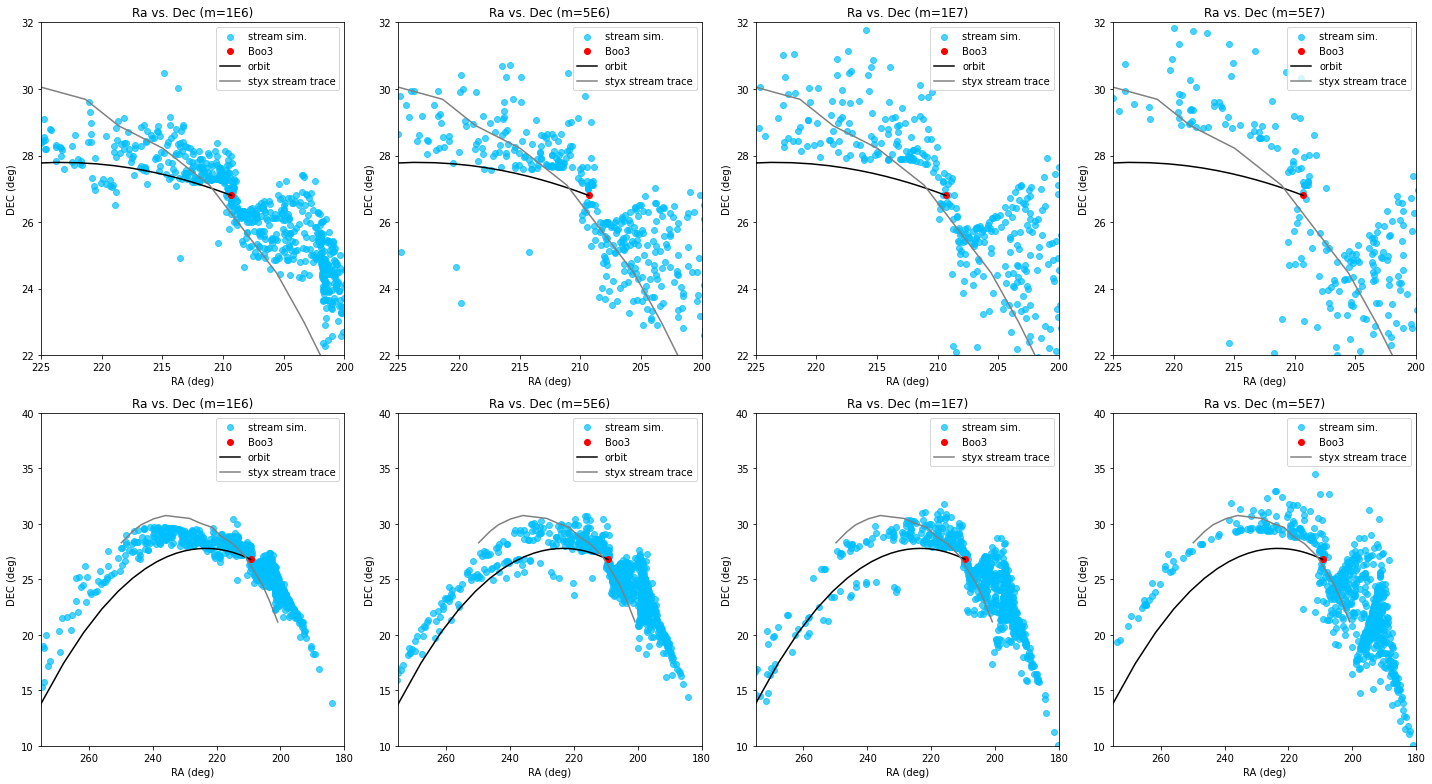

In [19]:
ointb = ok_intb
ointf = ok_intf

fig = plt.figure(figsize=(20,11))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(245)
ax3 = fig.add_subplot(242)
ax4 = fig.add_subplot(246)
ax5 = fig.add_subplot(243)
ax6 = fig.add_subplot(247)
ax7 = fig.add_subplot(244)
ax8 = fig.add_subplot(248)

ax1.scatter(oallk_lmc6.ra(), oallk_lmc6.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax1.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax1.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax1.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-', label='orbit');
#ax1.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax1.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax1.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax1.set_xlim(225, 200)
ax1.set_ylim(22, 32)
ax1.set_title('Ra vs. Dec (m=1E6)')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('DEC (deg)')
ax1.legend()

ax2.scatter(oallk_lmc6.ra(), oallk_lmc6.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax2.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax2.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax2.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-', label='orbit');
#ax2.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax2.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax2.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax2.set_xlim(275, 180)
ax2.set_ylim(10, 40)
ax2.set_title('Ra vs. Dec (m=1E6)')
ax2.set_xlabel('RA (deg)')
ax2.set_ylabel('DEC (deg)')
ax2.legend()


ax3.scatter(oallk_lmc65.ra(), oallk_lmc65.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax3.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax3.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax3.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-', label='orbit');
#ax3.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax3.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax3.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax3.set_xlim(225, 200)
ax3.set_ylim(22, 32)
ax3.set_title('Ra vs. Dec (m=5E6)')
ax3.set_xlabel('RA (deg)')
ax3.set_ylabel('DEC (deg)')
ax3.legend()

ax4.scatter(oallk_lmc65.ra(), oallk_lmc65.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax4.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax4.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax4.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-', label='orbit');
#ax2.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax4.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax4.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax4.set_xlim(275, 180)
ax4.set_ylim(10, 40)
ax4.set_title('Ra vs. Dec (m=5E6)')
ax4.set_xlabel('RA (deg)')
ax4.set_ylabel('DEC (deg)')
ax4.legend()


ax5.scatter(oallk_lmc7.ra(), oallk_lmc7.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax5.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax5.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax5.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-', label='orbit');
#ax5.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax5.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax5.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax5.set_xlim(225, 200)
ax5.set_ylim(22, 32)
ax5.set_title('Ra vs. Dec (m=1E7)')
ax5.set_xlabel('RA (deg)')
ax5.set_ylabel('DEC (deg)')
ax5.legend()

ax6.scatter(oallk_lmc7.ra(), oallk_lmc7.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax6.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax6.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax6.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-');
#ax2.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax6.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax6.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax6.set_xlim(275, 180)
ax6.set_ylim(10, 40)
ax6.set_title('Ra vs. Dec (m=1E7)')
ax6.set_xlabel('RA (deg)')
ax6.set_ylabel('DEC (deg)')
ax6.legend()


ax7.scatter(oallk_lmc75.ra(), oallk_lmc75.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax7.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax7.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax7.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-', label='orbit');
#ax5.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax7.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax7.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax7.set_xlim(225, 200)
ax7.set_ylim(22, 32)
ax7.set_title('Ra vs. Dec (m=5E7)')
ax7.set_xlabel('RA (deg)')
ax7.set_ylabel('DEC (deg)')
ax7.legend()

ax8.scatter(oallk_lmc75.ra(), oallk_lmc75.dec(), c='deepskyblue', label='stream sim.', alpha=0.7);
#ax6.scatter(ra, dec, facecolors='none', edgecolors='indigo', label='data')
ax8.plot(o.ra(), o.dec(), "ro", label='Boo3');
ax8.plot(ointb.ra(tsb), ointb.dec(tsb), 'k-');
#ax2.plot(ointf.ra(tsf), ointf.dec(tsf), 'k--');
#ax8.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
ax8.plot(styx_tra, styx_tdec, label='styx stream trace', c='grey')
ax8.set_xlim(275, 180)
ax8.set_ylim(10, 40)
ax8.set_title('Ra vs. Dec (m=5E7)')
ax8.set_xlabel('RA (deg)')
ax8.set_ylabel('DEC (deg)')
ax8.legend()

plt.tight_layout()

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"boo3_combined.csv",sep='\s+')

In [ ]:
#data['s5_rrl'] #RRL = [23:26]
#data['gaia'] #BHB = [26:]

In [ ]:
data['s5_rrl'].to_list()[23:26]
data['gaia'].to_list()[26:]

dist_kpc = data['distance_pc'].to_list()[23:]
dist_kpc = [x/1000 for x in dist_kpc]
dist_mod = data['dm'].to_list()[23:]
ra_deg = data['ra'].to_list()[23:]

In [ ]:
#pc to modulus: mod = np.log10(d)*5 -5

fig = plt.figure(figsize=(6,6))
ax6 = fig.add_subplot(111)

ax6.scatter(oallk_lmc65.ra(), np.log10(oallk_lmc65.dist()*1000)*5-5, c='deepskyblue', label='model');
ax6.scatter(o_k.ra(), np.log10(o_k.dist()*1000)*5-5, c='red', label='Boo3');
ax6.plot(ok_intb.ra(tsb), np.log10(ok_intb.dist(tsb)*1000)*5-5, 'k-');
ax6.plot(ok_intf.ra(tsf), np.log10(ok_intf.dist(tsf)*1000)*5-5, 'k--');
ax6.scatter(ra_deg, dist_mod, facecolors='none', edgecolors='indigo', label='data')
ax6.set_xlim(213, 206)
ax6.set_ylim(17.8,19)
ax6.legend()
ax6.set_title('Distance')
ax6.set_xlabel('RA (deg)')
ax6.set_ylabel('Distance modulus')

In [ ]:
fig = plt.figure(figsize=(6,6))
ax6 = fig.add_subplot(111)

ax6.scatter(oallk_lmc65.ra(), oallk_lmc65.dist(), c='deepskyblue', label='model');
ax6.scatter(o_k.ra(), o_k.dist(), c='red', label='Boo3');
ax6.plot(ok_intb.ra(tsb), ok_intb.dist(tsb), 'k-');
ax6.plot(ok_intf.ra(tsf), ok_intf.dist(tsf), 'k--');
ax6.scatter(ra_deg, dist_kpc, facecolors='none', edgecolors='indigo', label='data')
ax6.set_xlim(213, 206)
ax6.set_ylim(30,60)
ax6.legend()
ax6.set_title('Distance')
ax6.set_xlabel('RA (deg)')
ax6.set_ylabel('Distance (kpc)')

In [ ]:
fig = plt.figure(figsize=(6,6))
ax6 = fig.add_subplot(111)

ax6.scatter(oallk_lmc65.ra(), oallk_lmc65.dist(), c='deepskyblue', label='model');
ax6.scatter(o_k.ra(), o_k.dist(), c='red', label='Boo3');
ax6.plot(ok_intb.ra(tsb), ok_intb.dist(tsb), 'k-');
ax6.plot(ok_intf.ra(tsf), ok_intf.dist(tsf), 'k--');
ax6.scatter(ra_deg[:3], dist_kpc[:3], facecolors='none', edgecolors='red', label='data')
ax6.scatter(ra_deg[3:], dist_kpc[3:], facecolors='none', edgecolors='blue', label='data')
ax6.set_xlim(213, 206)
ax6.set_ylim(30,60)
ax6.legend()
ax6.set_title('Distance')
ax6.set_xlabel('RA (deg)')
ax6.set_ylabel('Distance (kpc)')

## Saving o_lmck with 5E6 Msol as csv data

In [ ]:
# model_data = pd.DataFrame(columns = ['ra', 'dec', 'dist', 'pmra', 'pmdec', 'vlos'])
# model_data['ra'] = oallk_lmc65.ra()
# model_data['dec'] = oallk_lmc65.dec()
# model_data['dist'] = oallk_lmc65.dist()
# model_data['pmra'] = oallk_lmc65.pmra()
# model_data['pmdec'] = oallk_lmc65.pmdec()
# model_data['vlos'] = oallk_lmc65.vlos()

# model_data.to_csv('boo3_spraymodel_5E6.csv')

In [ ]:
# model_data = pd.DataFrame(columns = ['ra', 'dec', 'dist', 'pmra', 'pmdec', 'vlos'])
# model_data['ra'] = oallk_lmc6.ra()
# model_data['dec'] = oallk_lmc6.dec()
# model_data['dist'] = oallk_lmc6.dist()
# model_data['pmra'] = oallk_lmc6.pmra()
# model_data['pmdec'] = oallk_lmc6.pmdec()
# model_data['vlos'] = oallk_lmc6.vlos()

# model_data.to_csv('boo3_spraymodel_1E6.csv')